In [16]:
#https://rightcode.co.jp/blog/information-technology/pytorch-mnist-learning
import torch.nn.functional as f
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import torch

In [17]:
class MyNet(torch.nn.Module):
    def __init__(self):
        super(MyNet, self).__init__()
        self.fc1 = torch.nn.Linear(28*28, 1000)
        self.fc2 = torch.nn.Linear(1000, 10)
    
    def forward(self, x):
        x = self.fc1(x)
        x = torch.sigmoid(x)
        x = self.fc2(x)
        
        return f.log_softmax(x, dim=1)

In [18]:
def load_MNIST(batch=128, intensity=1.0):
    train_loader = torch.utils.data.DataLoader(
        datasets.MNIST('./data',
                       train=True,
                       download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Lambda(lambda x: x * intensity)
                       ])),
        batch_size=batch,
        shuffle=True)
 
    test_loader = torch.utils.data.DataLoader(
        datasets.MNIST('./data',
                       train=False,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Lambda(lambda x: x * intensity)
                       ])),
        batch_size=batch,
        shuffle=True)
 
    return {'train': train_loader, 'test': test_loader}

In [19]:
num_epoch = 20
history = {
    'train_loss':[],
    'test_loss':[],
    'test_acc':[]
}

device = 'cuda' if torch.cuda.is_available() else 'cpu'
net = MyNet().to(device)
loaders = load_MNIST()


In [20]:
optimizer = torch.optim.Adam(params=net.parameters(), lr=0.001)

In [21]:
for i_epoch in range(num_epoch):
    loss = None
    
    net.train(True)
    
    for i, (data, target) in enumerate(loaders['train']):
        data = data.view(-1, 28*28)
        data = data.to(device)
        target = target.to(device)
        
        optimizer.zero_grad()
        output = net(data)
        loss = f.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        
        if i % 10 == 0:
            print('Training log: {} epoch ({} / 60000 train. data). Loss: {}'.format(i_epoch+1, (i+1)*128, loss.item()))
    
    history['train_loss'].append(loss)
    
    net.eval()
    test_loss = 0
    correct = 0
    
    with torch.no_grad():
        for data, target in loaders['test']:
            data = data.view(-1, 28*28)
            data = data.to(device)
            target = target.to(device)
            
            output = net(data)
            test_loss += f.nll_loss(output, target, reduction='sum').item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
    
    test_loss /= 10000
    print('Test loss (avg): {}, Accuracy: {}'.format(test_loss, correct / 10000))
    
    history['test_loss'].append(test_loss)
    history['test_acc'].append(correct / 10000)
    
    

Training log: 1 epoch (128 / 60000 train. data). Loss: 2.3162682056427
Training log: 1 epoch (1408 / 60000 train. data). Loss: 1.7962558269500732
Training log: 1 epoch (2688 / 60000 train. data). Loss: 1.3721257448196411
Training log: 1 epoch (3968 / 60000 train. data). Loss: 1.0675668716430664
Training log: 1 epoch (5248 / 60000 train. data). Loss: 0.8228241205215454
Training log: 1 epoch (6528 / 60000 train. data). Loss: 0.7336229085922241
Training log: 1 epoch (7808 / 60000 train. data). Loss: 0.5817764401435852
Training log: 1 epoch (9088 / 60000 train. data). Loss: 0.5774012804031372
Training log: 1 epoch (10368 / 60000 train. data). Loss: 0.44856444001197815
Training log: 1 epoch (11648 / 60000 train. data). Loss: 0.45691654086112976
Training log: 1 epoch (12928 / 60000 train. data). Loss: 0.48051416873931885
Training log: 1 epoch (14208 / 60000 train. data). Loss: 0.42083701491355896
Training log: 1 epoch (15488 / 60000 train. data). Loss: 0.45340049266815186
Training log: 1 epo

Training log: 3 epoch (18048 / 60000 train. data). Loss: 0.1395236849784851
Training log: 3 epoch (19328 / 60000 train. data). Loss: 0.27121981978416443
Training log: 3 epoch (20608 / 60000 train. data). Loss: 0.19735509157180786
Training log: 3 epoch (21888 / 60000 train. data). Loss: 0.20224367082118988
Training log: 3 epoch (23168 / 60000 train. data). Loss: 0.34012436866760254
Training log: 3 epoch (24448 / 60000 train. data). Loss: 0.1712912619113922
Training log: 3 epoch (25728 / 60000 train. data). Loss: 0.11843408644199371
Training log: 3 epoch (27008 / 60000 train. data). Loss: 0.12495217472314835
Training log: 3 epoch (28288 / 60000 train. data). Loss: 0.18759121000766754
Training log: 3 epoch (29568 / 60000 train. data). Loss: 0.17633309960365295
Training log: 3 epoch (30848 / 60000 train. data). Loss: 0.17662309110164642
Training log: 3 epoch (32128 / 60000 train. data). Loss: 0.17821402847766876
Training log: 3 epoch (33408 / 60000 train. data). Loss: 0.12728384137153625
T

Training log: 5 epoch (33408 / 60000 train. data). Loss: 0.09063932299613953
Training log: 5 epoch (34688 / 60000 train. data). Loss: 0.12141234427690506
Training log: 5 epoch (35968 / 60000 train. data). Loss: 0.05259301885962486
Training log: 5 epoch (37248 / 60000 train. data). Loss: 0.0984300971031189
Training log: 5 epoch (38528 / 60000 train. data). Loss: 0.09386767446994781
Training log: 5 epoch (39808 / 60000 train. data). Loss: 0.14235177636146545
Training log: 5 epoch (41088 / 60000 train. data). Loss: 0.16881124675273895
Training log: 5 epoch (42368 / 60000 train. data). Loss: 0.11027459800243378
Training log: 5 epoch (43648 / 60000 train. data). Loss: 0.11123707890510559
Training log: 5 epoch (44928 / 60000 train. data). Loss: 0.08134406805038452
Training log: 5 epoch (46208 / 60000 train. data). Loss: 0.10475914180278778
Training log: 5 epoch (47488 / 60000 train. data). Loss: 0.08341480046510696
Training log: 5 epoch (48768 / 60000 train. data). Loss: 0.09280708432197571


Training log: 7 epoch (48768 / 60000 train. data). Loss: 0.054858386516571045
Training log: 7 epoch (50048 / 60000 train. data). Loss: 0.07039310038089752
Training log: 7 epoch (51328 / 60000 train. data). Loss: 0.07780404388904572
Training log: 7 epoch (52608 / 60000 train. data). Loss: 0.03291697055101395
Training log: 7 epoch (53888 / 60000 train. data). Loss: 0.06875099241733551
Training log: 7 epoch (55168 / 60000 train. data). Loss: 0.04637705162167549
Training log: 7 epoch (56448 / 60000 train. data). Loss: 0.054294146597385406
Training log: 7 epoch (57728 / 60000 train. data). Loss: 0.02882697805762291
Training log: 7 epoch (59008 / 60000 train. data). Loss: 0.053605593740940094
Test loss (avg): 0.08556960549354553, Accuracy: 0.9752
Training log: 8 epoch (128 / 60000 train. data). Loss: 0.041996851563453674
Training log: 8 epoch (1408 / 60000 train. data). Loss: 0.03265228495001793
Training log: 8 epoch (2688 / 60000 train. data). Loss: 0.03874948248267174
Training log: 8 epoch

Training log: 10 epoch (2688 / 60000 train. data). Loss: 0.02461164817214012
Training log: 10 epoch (3968 / 60000 train. data). Loss: 0.047325409948825836
Training log: 10 epoch (5248 / 60000 train. data). Loss: 0.029684768989682198
Training log: 10 epoch (6528 / 60000 train. data). Loss: 0.019812919199466705
Training log: 10 epoch (7808 / 60000 train. data). Loss: 0.09304306656122208
Training log: 10 epoch (9088 / 60000 train. data). Loss: 0.03569022938609123
Training log: 10 epoch (10368 / 60000 train. data). Loss: 0.06693615019321442
Training log: 10 epoch (11648 / 60000 train. data). Loss: 0.032540999352931976
Training log: 10 epoch (12928 / 60000 train. data). Loss: 0.046546030789613724
Training log: 10 epoch (14208 / 60000 train. data). Loss: 0.051475320011377335
Training log: 10 epoch (15488 / 60000 train. data). Loss: 0.03770950064063072
Training log: 10 epoch (16768 / 60000 train. data). Loss: 0.05569068714976311
Training log: 10 epoch (18048 / 60000 train. data). Loss: 0.0584

Training log: 12 epoch (15488 / 60000 train. data). Loss: 0.051251888275146484
Training log: 12 epoch (16768 / 60000 train. data). Loss: 0.04138277843594551
Training log: 12 epoch (18048 / 60000 train. data). Loss: 0.009924862533807755
Training log: 12 epoch (19328 / 60000 train. data). Loss: 0.02506682276725769
Training log: 12 epoch (20608 / 60000 train. data). Loss: 0.018612518906593323
Training log: 12 epoch (21888 / 60000 train. data). Loss: 0.013508802279829979
Training log: 12 epoch (23168 / 60000 train. data). Loss: 0.02085224539041519
Training log: 12 epoch (24448 / 60000 train. data). Loss: 0.03904496878385544
Training log: 12 epoch (25728 / 60000 train. data). Loss: 0.025361565873026848
Training log: 12 epoch (27008 / 60000 train. data). Loss: 0.012164702638983727
Training log: 12 epoch (28288 / 60000 train. data). Loss: 0.015780463814735413
Training log: 12 epoch (29568 / 60000 train. data). Loss: 0.04239964112639427
Training log: 12 epoch (30848 / 60000 train. data). Loss:

Training log: 14 epoch (28288 / 60000 train. data). Loss: 0.01921653188765049
Training log: 14 epoch (29568 / 60000 train. data). Loss: 0.0038495007902383804
Training log: 14 epoch (30848 / 60000 train. data). Loss: 0.04519383981823921
Training log: 14 epoch (32128 / 60000 train. data). Loss: 0.01795186474919319
Training log: 14 epoch (33408 / 60000 train. data). Loss: 0.035499684512615204
Training log: 14 epoch (34688 / 60000 train. data). Loss: 0.01165428850799799
Training log: 14 epoch (35968 / 60000 train. data). Loss: 0.013560046441853046
Training log: 14 epoch (37248 / 60000 train. data). Loss: 0.045105576515197754
Training log: 14 epoch (38528 / 60000 train. data). Loss: 0.0036229602992534637
Training log: 14 epoch (39808 / 60000 train. data). Loss: 0.007982602342963219
Training log: 14 epoch (41088 / 60000 train. data). Loss: 0.009420149028301239
Training log: 14 epoch (42368 / 60000 train. data). Loss: 0.027714939787983894
Training log: 14 epoch (43648 / 60000 train. data). Lo

Training log: 16 epoch (41088 / 60000 train. data). Loss: 0.009777403436601162
Training log: 16 epoch (42368 / 60000 train. data). Loss: 0.003573128953576088
Training log: 16 epoch (43648 / 60000 train. data). Loss: 0.007709193974733353
Training log: 16 epoch (44928 / 60000 train. data). Loss: 0.0042450278997421265
Training log: 16 epoch (46208 / 60000 train. data). Loss: 0.008267104625701904
Training log: 16 epoch (47488 / 60000 train. data). Loss: 0.023743154481053352
Training log: 16 epoch (48768 / 60000 train. data). Loss: 0.00794592872262001
Training log: 16 epoch (50048 / 60000 train. data). Loss: 0.005987100303173065
Training log: 16 epoch (51328 / 60000 train. data). Loss: 0.006606485694646835
Training log: 16 epoch (52608 / 60000 train. data). Loss: 0.004354953765869141
Training log: 16 epoch (53888 / 60000 train. data). Loss: 0.04312510043382645
Training log: 16 epoch (55168 / 60000 train. data). Loss: 0.010863606818020344
Training log: 16 epoch (56448 / 60000 train. data). L

Training log: 18 epoch (53888 / 60000 train. data). Loss: 0.004112806171178818
Training log: 18 epoch (55168 / 60000 train. data). Loss: 0.006106095388531685
Training log: 18 epoch (56448 / 60000 train. data). Loss: 0.011386847123503685
Training log: 18 epoch (57728 / 60000 train. data). Loss: 0.011911343783140182
Training log: 18 epoch (59008 / 60000 train. data). Loss: 0.004600172862410545
Test loss (avg): 0.07011215901374816, Accuracy: 0.9798
Training log: 19 epoch (128 / 60000 train. data). Loss: 0.021432483568787575
Training log: 19 epoch (1408 / 60000 train. data). Loss: 0.008428698405623436
Training log: 19 epoch (2688 / 60000 train. data). Loss: 0.013587994500994682
Training log: 19 epoch (3968 / 60000 train. data). Loss: 0.008208619430661201
Training log: 19 epoch (5248 / 60000 train. data). Loss: 0.006712013855576515
Training log: 19 epoch (6528 / 60000 train. data). Loss: 0.004298120737075806
Training log: 19 epoch (7808 / 60000 train. data). Loss: 0.0008708648383617401
Trai

{'train_loss': [tensor(0.4600, device='cuda:0', grad_fn=<NllLossBackward>), tensor(0.2553, device='cuda:0', grad_fn=<NllLossBackward>), tensor(0.0926, device='cuda:0', grad_fn=<NllLossBackward>), tensor(0.1647, device='cuda:0', grad_fn=<NllLossBackward>), tensor(0.0998, device='cuda:0', grad_fn=<NllLossBackward>), tensor(0.0708, device='cuda:0', grad_fn=<NllLossBackward>), tensor(0.0896, device='cuda:0', grad_fn=<NllLossBackward>), tensor(0.0276, device='cuda:0', grad_fn=<NllLossBackward>), tensor(0.0506, device='cuda:0', grad_fn=<NllLossBackward>), tensor(0.0633, device='cuda:0', grad_fn=<NllLossBackward>), tensor(0.0126, device='cuda:0', grad_fn=<NllLossBackward>), tensor(0.0102, device='cuda:0', grad_fn=<NllLossBackward>), tensor(0.0306, device='cuda:0', grad_fn=<NllLossBackward>), tensor(0.0358, device='cuda:0', grad_fn=<NllLossBackward>), tensor(0.0169, device='cuda:0', grad_fn=<NllLossBackward>), tensor(0.0023, device='cuda:0', grad_fn=<NllLossBackward>), tensor(0.0205, device='c

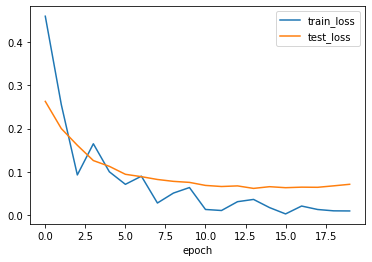

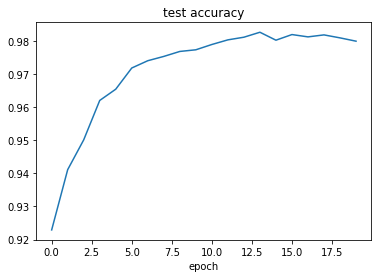

In [84]:
num_epoch
print(history)
plt.figure()
plt.plot(range(len(history['train_loss'])), history['train_loss'], label='train_loss')
plt.plot(range(len(history['test_loss'])), history['test_loss'], label='test_loss')
plt.xlabel('epoch')
plt.legend()
plt.savefig('loss.png')

plt.figure()
plt.plot(range(len(history['test_acc'])), history['test_acc'])
plt.title('test accuracy')
plt.xlabel('epoch')
plt.savefig('test_acc.png')